## Import from Scripts

In [1]:
# --- 1. Imports & Setup
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from scripts.data_loader import load_yfinance_data
from scripts.indicators import (
    add_trend_indicators,
    add_momentum_indicators,
    add_volatility_indicators,
    add_volume_indicators
)
from scripts.signals import generate_trading_signals
from scripts.portfolio import (
    calculate_returns,
    calculate_portfolio_metrics,
    plot_portfolio_performance
)


plt.style.use('seaborn-v0_8')
# plot_portfolio_performance(portfolio_returns)


## Load AAPL Data

In [2]:
# --- 2. Load and Prepare All Stock Data
all_stocks = load_yfinance_data()  # loads data/yfinance_data/*.csv


## Apply All Indicators

In [3]:
# --- 3. Apply Indicators & Generate Signals
for name, df in all_stocks.items():
    df = add_trend_indicators(df)
    df = add_momentum_indicators(df)
    df = add_volatility_indicators(df)
    df = add_volume_indicators(df)
    df = generate_trading_signals(df)
    all_stocks[name] = df


## Visualize SMA vs Closing Price


📊 Plotting: AAPL


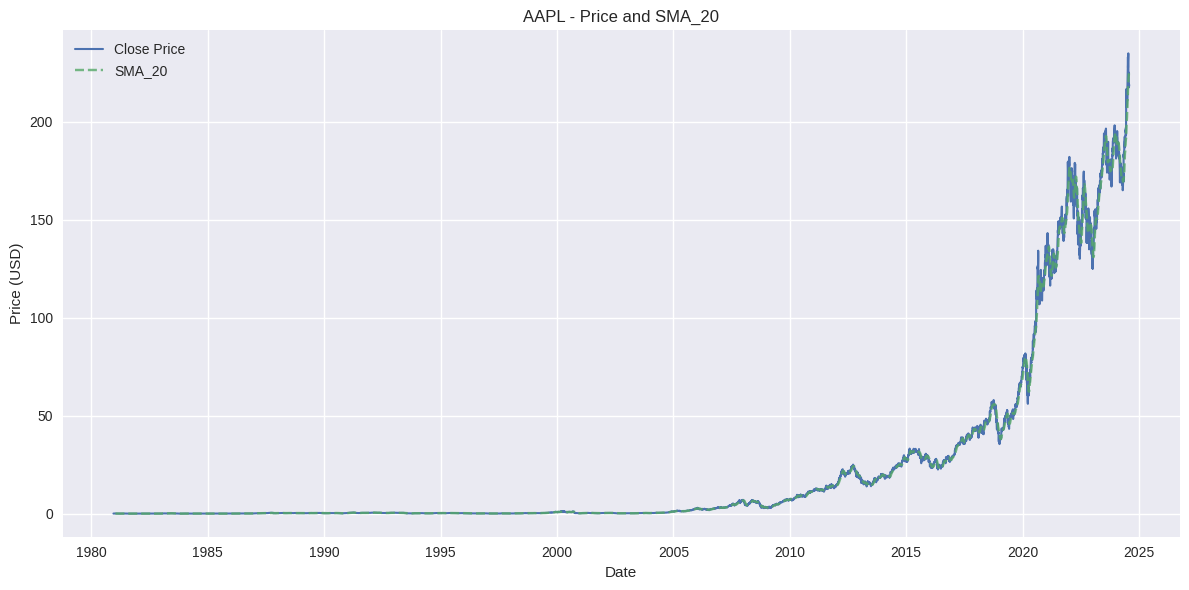


📊 Plotting: AMZN


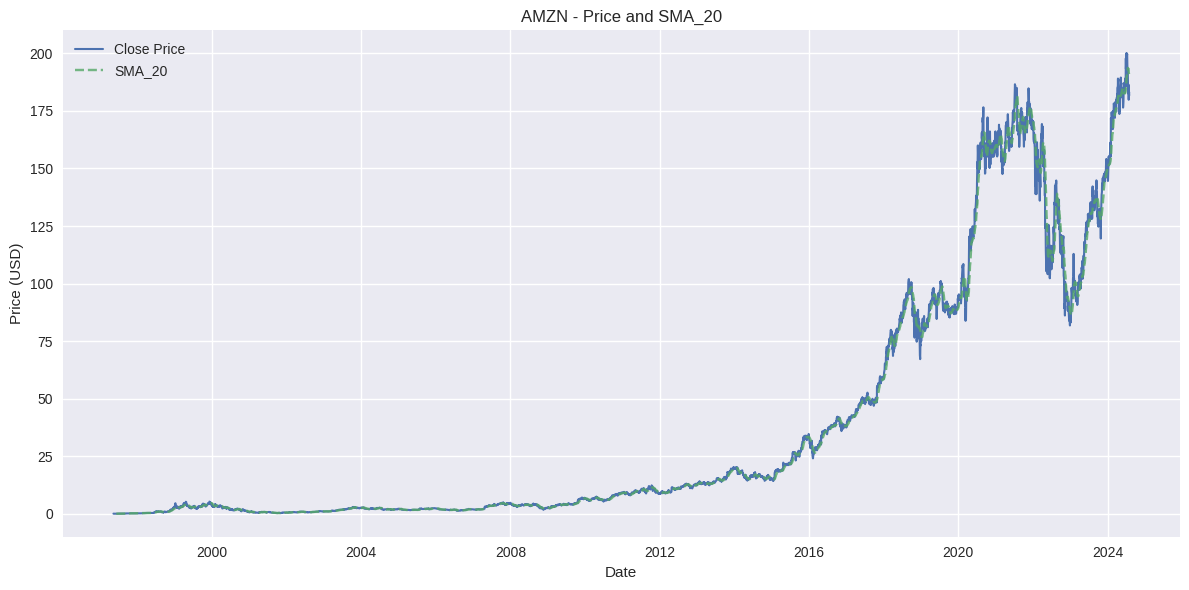


📊 Plotting: GOOG


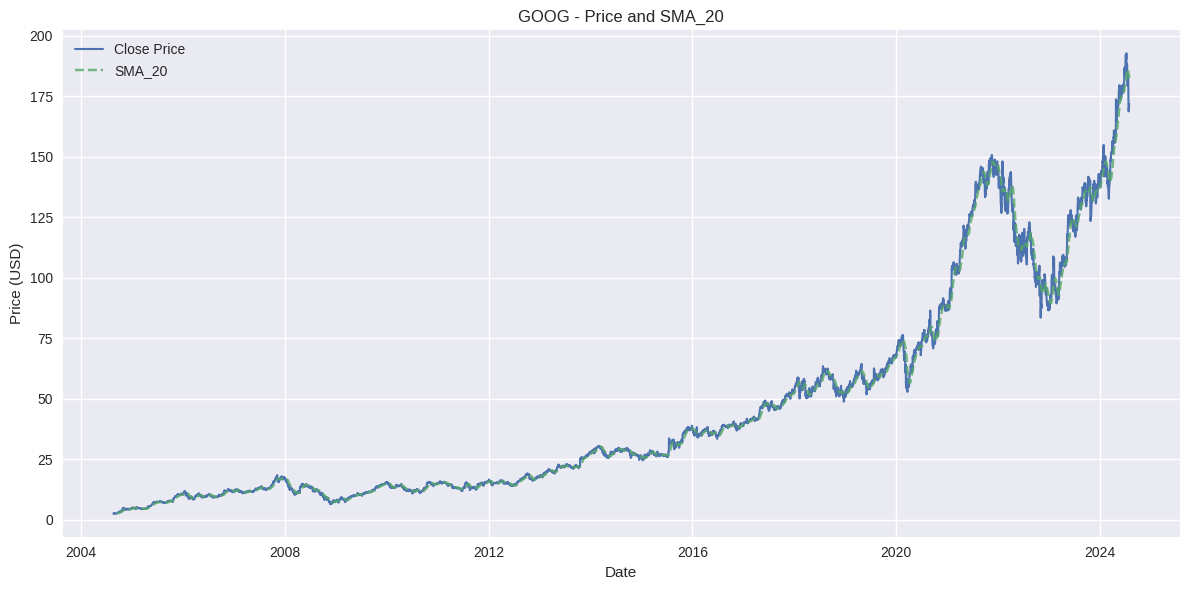


📊 Plotting: META


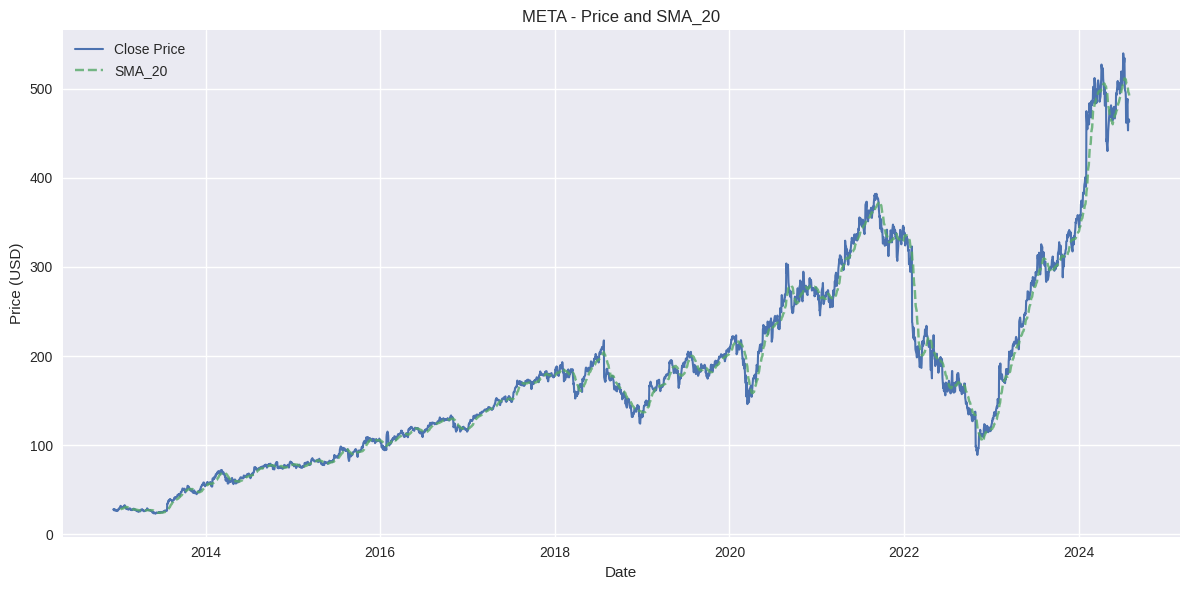


📊 Plotting: MSFT


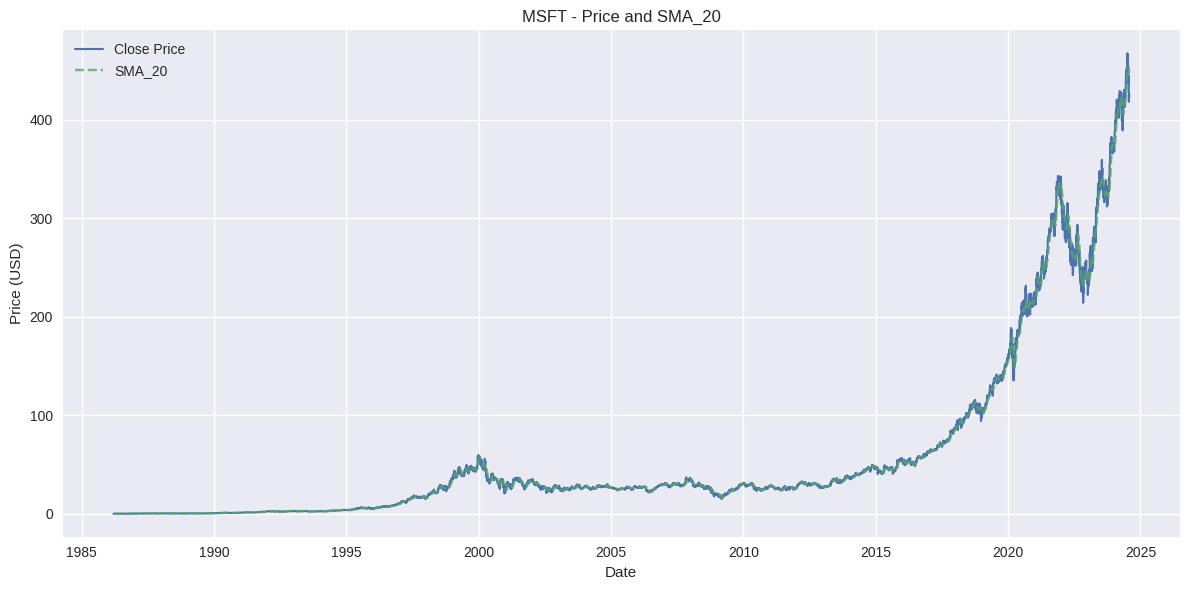


📊 Plotting: NVDA


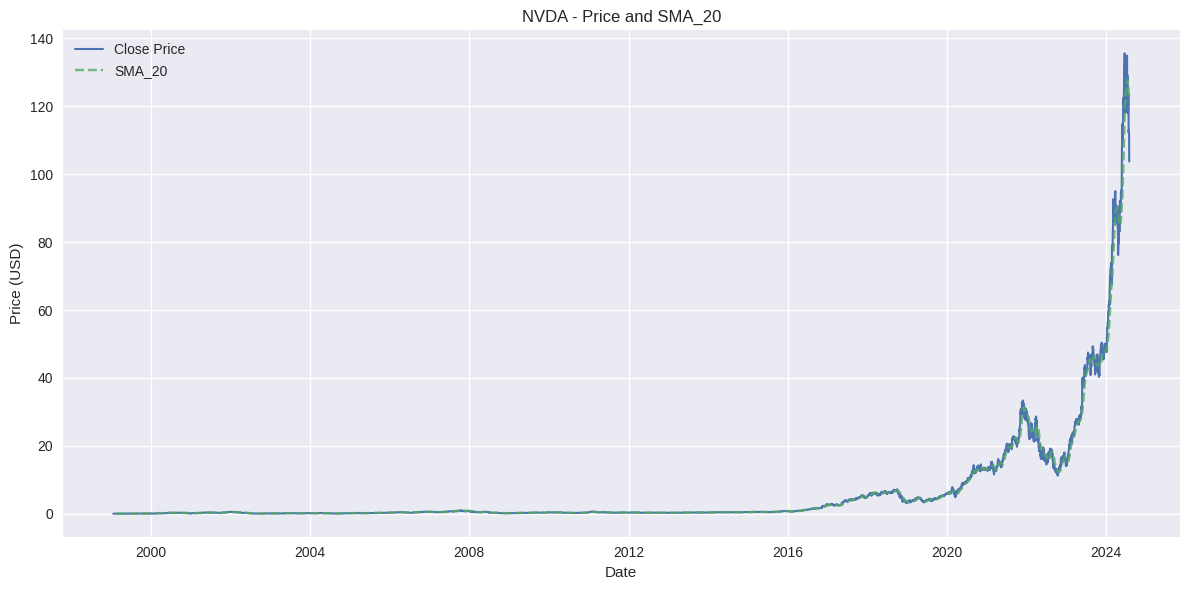


📊 Plotting: TSLA


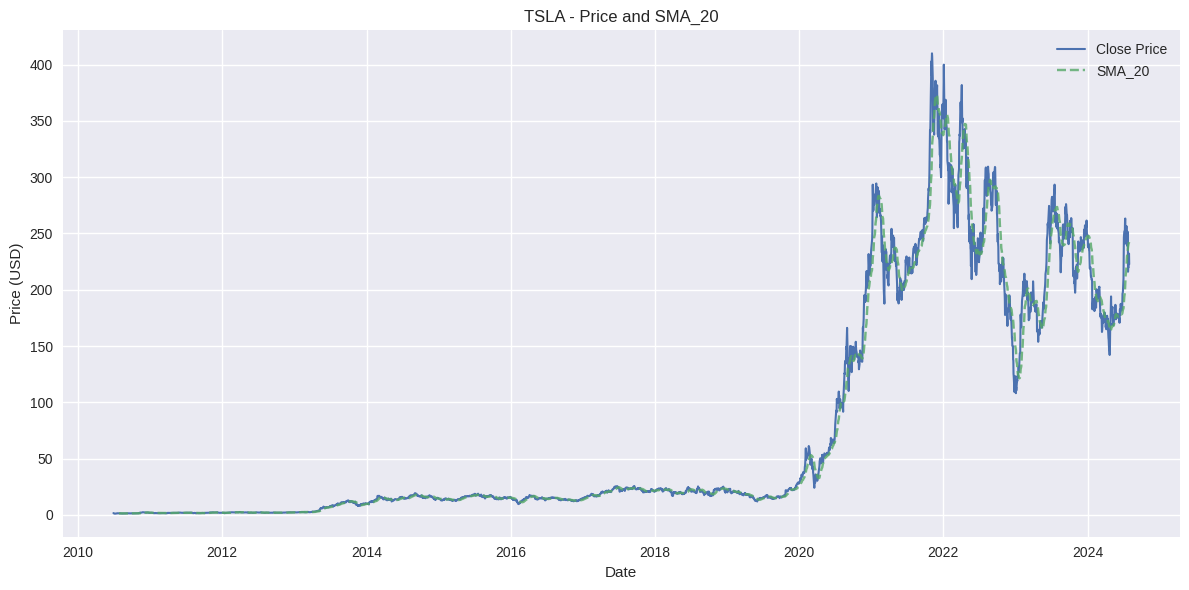

In [ ]:
from scripts.plot_utils import plot_price_and_sma

tickers_to_plot = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']

for ticker in tickers_to_plot:
    print(f"\n📊 Plotting: {ticker}")
    plot_price_and_sma(all_stocks[ticker], ticker=ticker)


📊 Individual Stock Metrics Summary:
      Annual Return  Volatility  Sharpe Ratio
TSLA       0.512784    0.569441      0.900505
GOOG       0.259189    0.306667      0.845181
META       0.317424    0.385387      0.823650
MSFT       0.274836    0.335368      0.819506
NVDA       0.487007    0.601090      0.810206
AMZN       0.432395    0.562420      0.768811
AAPL       0.270281    0.442814      0.610373


<Axes: title={'center': 'Sharpe Ratio by Stock'}>

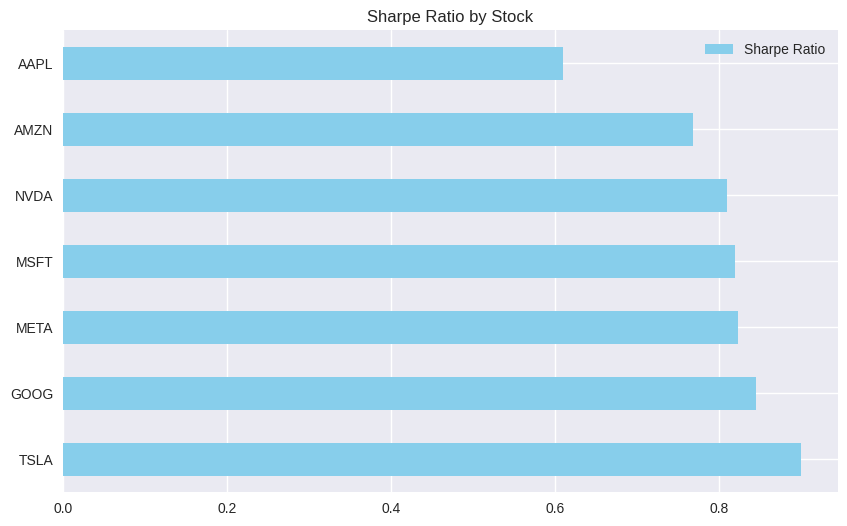

In [5]:
# Step 1: Prepare dictionary to store per-stock metrics
individual_metrics = {}

# Step 2: Loop through each stock and calculate its metrics
for ticker, df in all_stocks.items():
    if 'Close' not in df.columns or df['Close'].isnull().all():
        continue  # skip if data is invalid

    # Daily returns for the stock
    returns = df['Close'].pct_change().dropna()

    # Portfolio metrics (annual return, volatility, sharpe)
    annual_ret, vol, sharpe = calculate_portfolio_metrics(returns)

    individual_metrics[ticker] = {
        'Annual Return': annual_ret,
        'Volatility': vol,
        'Sharpe Ratio': sharpe
    }

# Step 3: Convert to DataFrame and sort by Sharpe
metrics_df = pd.DataFrame.from_dict(individual_metrics, orient='index')
metrics_df = metrics_df.sort_values(by='Sharpe Ratio', ascending=False)

# Step 4: Display results
print("📊 Individual Stock Metrics Summary:")
print(metrics_df)

# Optional: Plot
metrics_df[['Sharpe Ratio']].plot(kind='barh', figsize=(10, 6), title='Sharpe Ratio by Stock', color='skyblue')


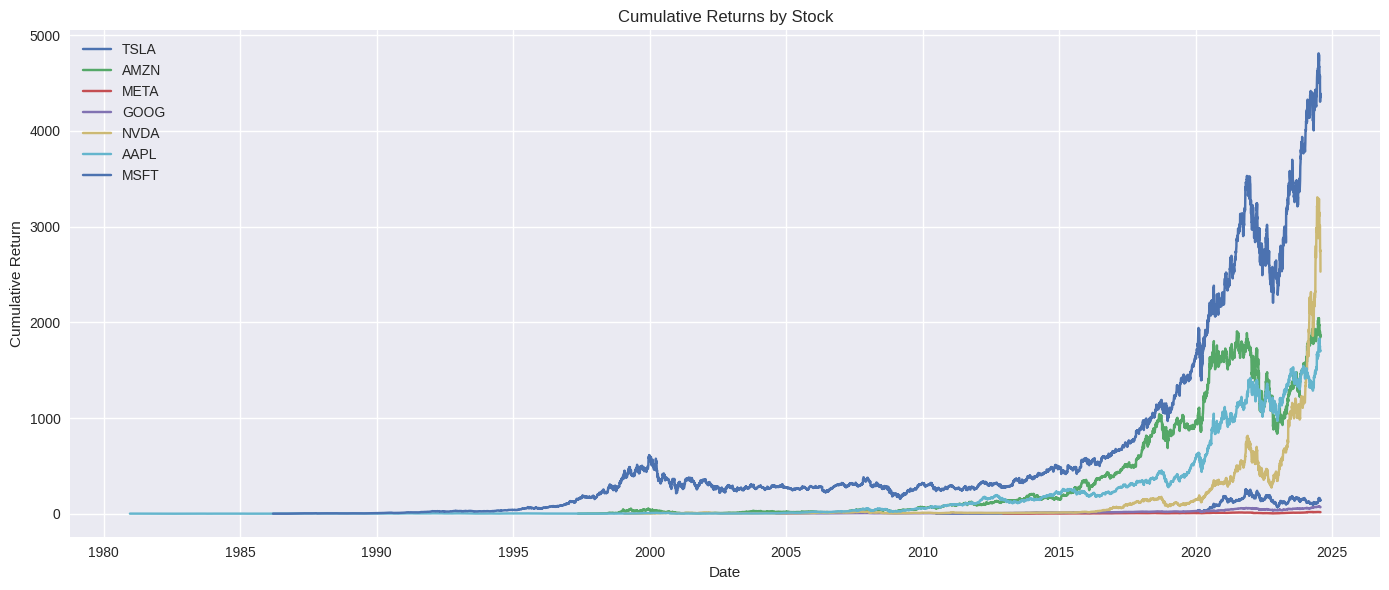

In [6]:
# Build a dict of {ticker: daily_returns}
returns_dict = {
    ticker: df['Close'].pct_change().dropna()
    for ticker, df in all_stocks.items()
    if 'Close' in df.columns and not df['Close'].isnull().all()
}

# Plot all cumulative returns
from scripts.plot_utils import plot_cumulative_returns
plot_cumulative_returns(returns_dict)
